<a href="https://colab.research.google.com/github/yatchit888/Healthcare-diabetes-classification/blob/main/Diabetes_Classification_Group_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Term Project
**Project:** Diabetes Classification

**Course:** Applied Mathematical Concepts for Machine Learning

**Program:** T431 - Applied A.I. Solutions Development

**Group 6**
1. Ahmed Ali
2. Nichapat Boonprasertsri
3. Anuphap Chansatit
4. Karthikeyan Jeyabalasuntharam
5. Yat Chit Law
6. Halari Shanpru
7. Vitchaya Siripoppohn
8. Chotiros Srisiam


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Data
df=pd.read_csv("Healthcare-Diabetes.csv")

## Exploratory Data Analysis (EDA)

In [ ]:
# See sample data
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [ ]:
# Check if there is a missing value
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Check if there is a duplicated sample
df.duplicated().sum()

0

In [ ]:
# List columns
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


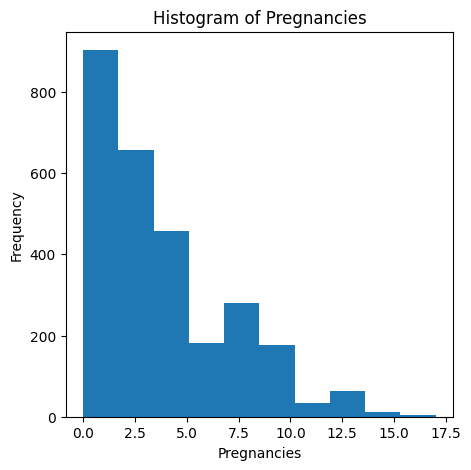

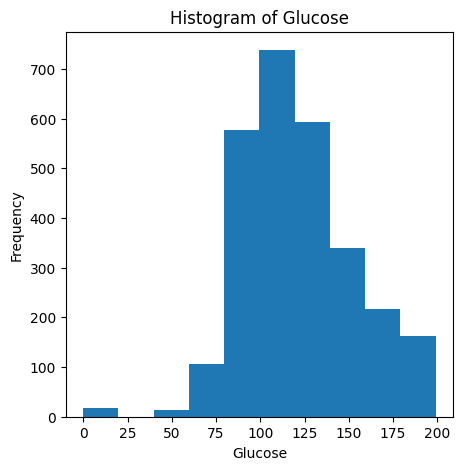

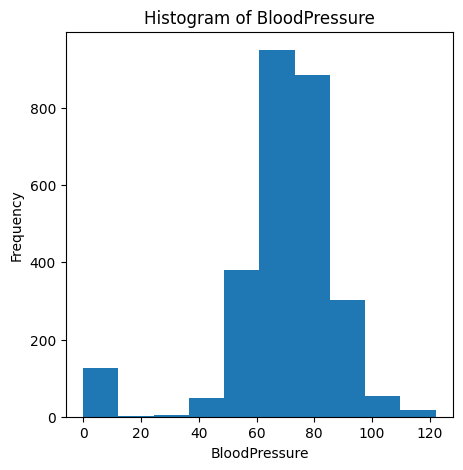

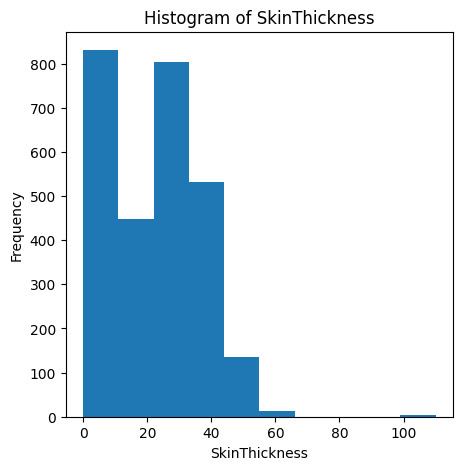

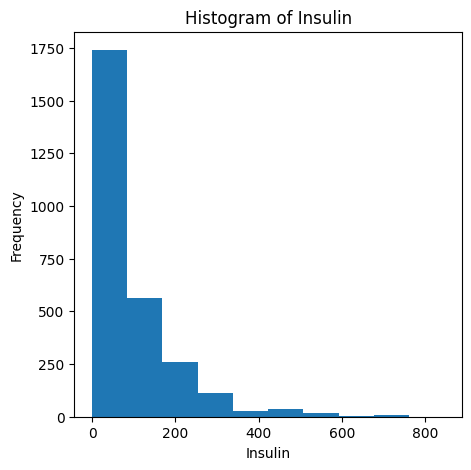

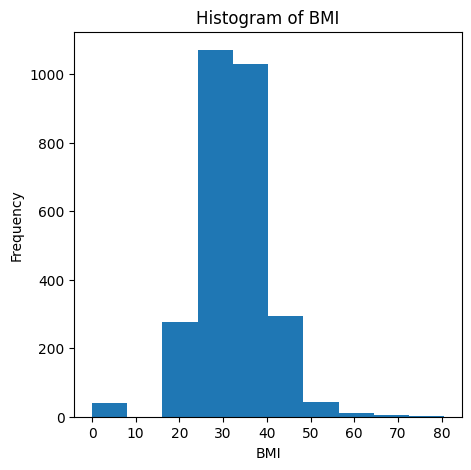

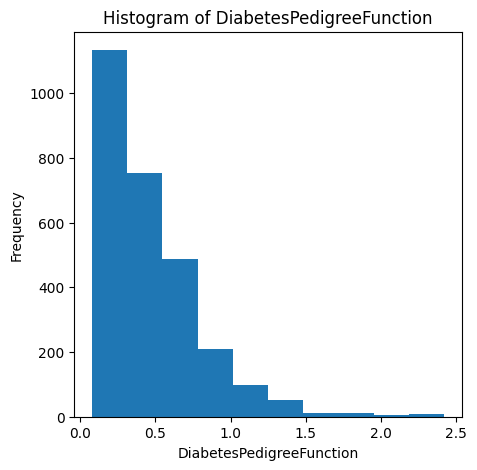

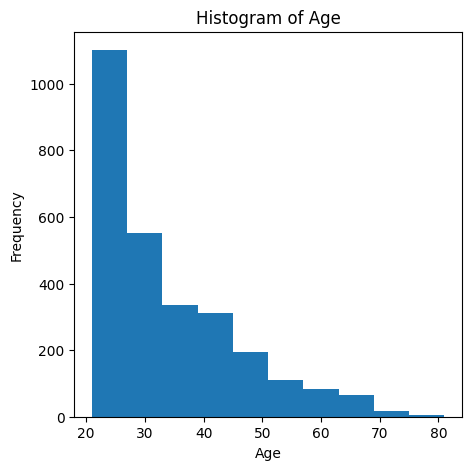

In [ ]:
# Plot histogram of value in each feature
remove_first_last = df.iloc[:, 1:-1]

for column in remove_first_last.columns:
    plt.figure(figsize=(5, 5))
    plt.hist(remove_first_last[column], bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

<Axes: title={'center': 'Diabetes Outcome'}>

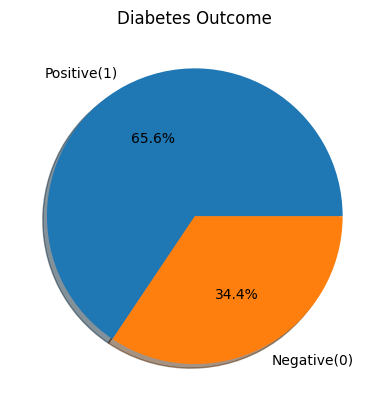

In [ ]:
# Find proportion of positive vs negative outcome
df["Outcome"].value_counts().plot(kind="pie",
                                  title='Diabetes Outcome',
                                  labels=['Positive(1)', 'Negative(0)'],
                                  ylabel='',
                                  shadow=True,
                                  autopct="%1.1f%%")

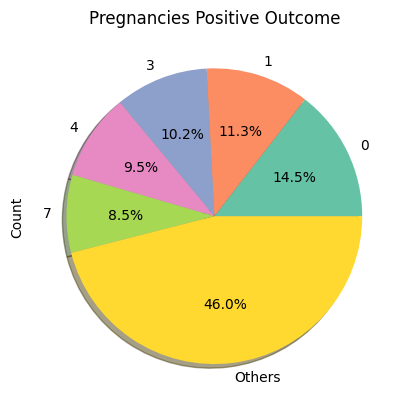

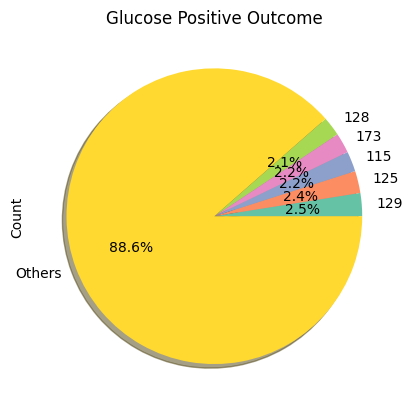

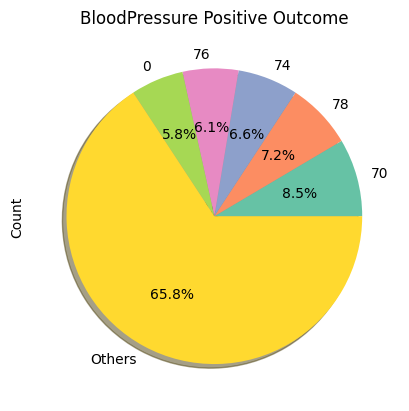

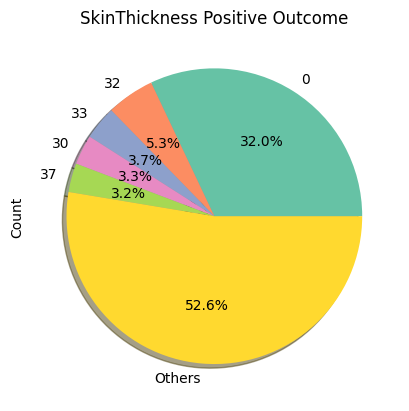

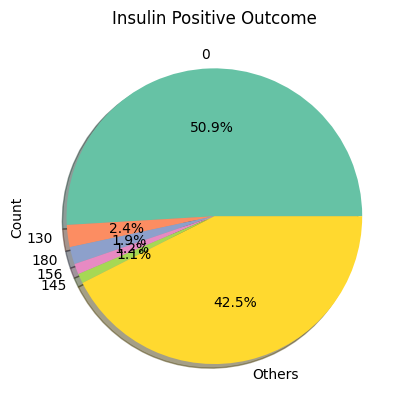

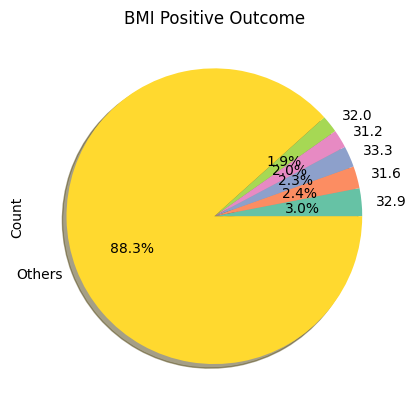

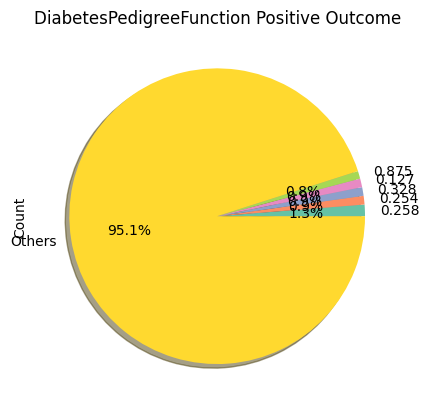

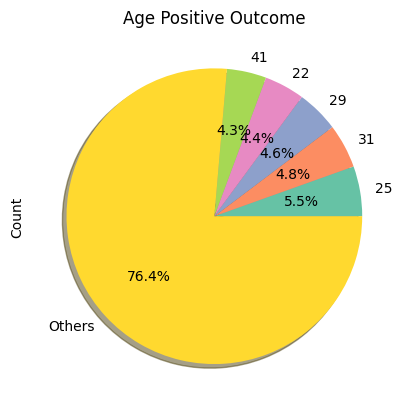

In [ ]:
# Feature vs Positive Outcome
def create_positive_pie_chart(feature):
    positive_outcome = df[df['Outcome']==1][feature].value_counts()
    top_5_values = positive_outcome.head(5)

    sum_of_others = positive_outcome.iloc[5:].sum()

    pie_data = pd.DataFrame({'Value': top_5_values.index, 'Count': top_5_values.values})
    pie_data.loc[5] = ['Others', sum_of_others]

    pie_data['Count'].plot(kind='pie',
                           title=feature+' Positive Outcome',
                           labels=pie_data['Value'],
                           shadow=True,
                           colors=sns.color_palette('Set2'),
                           autopct='%1.1f%%')
    plt.show()

for i in remove_first_last:
    create_positive_pie_chart(i)

In [ ]:
# Check if there is 0 in each feature
remove_first_last.eq(0).sum()

Pregnancies                  412
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
dtype: int64

# Data Preprocessing

In [ ]:
# Replace 0 in SkinThickness with Median
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['SkinThickness'] = df['SkinThickness'].round().astype(int)
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,23,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Replace 0 in Insulin with Median
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['Insulin'] = df['Insulin'].round().astype(int)
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,37,33.6,0.627,50,1
1,2,1,85,66,29,37,26.6,0.351,31,0
2,3,8,183,64,23,37,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Drop ID column as it is not a feature
df = df.drop(columns='Id')

# Filter that cannot be zero
filter_zero = df.loc[(df['Glucose'] != 0) & (df['BloodPressure'] != 0) & (df['BMI'] != 0) ,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']]
filter_zero.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,37,33.6,0.627,50,1
1,1,85,66,29,37,26.6,0.351,31,0
2,8,183,64,23,37,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Training for feature selection
from sklearn.model_selection import train_test_split
X = filter_zero.drop(['Outcome'], axis=1)
y = filter_zero['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train size: {}, X_test size: {}, y_train size: {}'.format(X_train.shape, X_test.shape, y_train.shape))
len(X), len(y)

X_train size: (2089, 8), X_test size: (523, 8), y_train size: (2089,)


(2612, 2612)

In [ ]:
#Scaling values to improve model performance
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xss = ss.fit_transform(X)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)


## Data Classification

### Model Comparison without GridSearchCV

In [ ]:
# Using the models without GridSearchCV to compare
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(lr_pred, y_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_accuracy = accuracy_score(dtc_pred, y_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_accuracy = accuracy_score(rfc_pred, y_test)

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
sgd_accuracy = accuracy_score(sgd_pred, y_test)

svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(svc_pred, y_test)

d = {'default': [lr_accuracy, dtc_accuracy, rfc_accuracy, sgd_accuracy, svc_accuracy]}

naive_df = pd.DataFrame(data=d)

naive_df

,default
0,0.778203
1,0.992352
2,0.984704
3,0.757170
4,0.837476


### Model Comparison with GridSearchCV

In [ ]:
# Define a function which takes in parameters X (the feature set) and y (the target variable)
# Perform GridSearch CV using this function to iterate through different models and hyperparameters
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Function for finding the best model
def find_best_model_using_gridsearchcv(X,y, X_test, y_test):
    algos = {
        'Logistic': {
            'model': LogisticRegression(),
            'params': {
                'max_iter' : [50, 100, 200, None],
                'penalty': ['l1', 'l2', 'elasticnet', None],
                'C': [0.5, 1, 1.5, 2, 5, 10],
                'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ['gini','entropy', 'log_loss'],
                'splitter': ['best','random'],
                'max_depth': [5, 10, 20, None]
            }
        },
        'random_forest' : {
            'model': RandomForestClassifier(),
            'params': {
            'criterion' : ['gini', 'entropy'],
            'n_estimators' : [50, 100, 200],
            'max_depth': [5, 10, 20, None]
           }
        },
         'SGD' : {
            'model': SGDClassifier(),
            'params': {
                'loss': ['hinge', 'log_loss', 'modified_huber'],
                'penalty': [None, 'l1', 'l2', 'elasticnet'],
                'alpha': [0.01, 0.1, 1, 10],
                'max_iter': [100, 500, 1000, 5000],
            }
        },
         'SVM' : {
            'model': SVC(),
            'params': {
                'C': [1, 2, 3],
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
            }
        }
    }
    scores = []
    metrics=[]
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, scoring='accuracy')

        gs.fit(X,y)


        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
        })

    score_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

    return score_df

df1 = find_best_model_using_gridsearchcv(X_train, y_train, X_test, y_test)
df2 = pd.concat([df1,naive_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
#Display the best score and parameter
df2


,model,best_score,best_params,default
0,Logistic,0.775019,"{'C': 1, 'max_iter': 50, 'penalty': 'l1', 'sol...",0.778203
1,decision_tree,0.977504,"{'criterion': 'gini', 'max_depth': 20, 'splitt...",0.992352
2,random_forest,0.982286,"{'criterion': 'gini', 'max_depth': 20, 'n_esti...",0.984704
3,SGD,0.776930,"{'alpha': 0.01, 'loss': 'log_loss', 'max_iter'...",0.757170
4,SVM,0.852565,"{'C': 3, 'kernel': 'rbf'}",0.837476


## Drop Feature Individually and Run GridSearchCV

In [ ]:
# Convert the training data to a DataFrame and use the first 8 column names from the original DataFrame
X_train = pd.DataFrame(data=X_train, columns = df.columns[:8])

# Initialize a DataFrame to store the best scores from GridSearchCV for each feature
result_df = pd.DataFrame(columns=X_train.columns)

for i in range(len(X_train.columns)):

     # Drop the current feature from the training data
    newX = X_train.drop(X_train.columns[i], axis=1)

    # Run GridSearchCV on the data without the current feature, and get the best model
    newdf = find_best_model_using_gridsearchcv(newX, y_train, X_test, y_test)

    # Store the best score of the model in the result DataFrame
    result_df[X_train.columns[i]] = newdf.best_score


In [ ]:
# Print out the result after remove some features in each model
modellist = pd.DataFrame(data=['Logistic','Decision Tree', 'Random Forest', 'SGD', 'SVM'], columns = ['Model / Feature'])
final_df = pd.concat([modellist, result_df], axis=1)
final_df

,Model / Feature,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,Logistic,0.770226,0.704645,0.775017,0.778367,0.773099,0.771190,0.767835,0.773580
1,Decision Tree,0.975587,0.975108,0.979418,0.978455,0.975584,0.977984,0.978934,0.972715
2,Random Forest,0.982768,0.977502,0.982286,0.981808,0.980856,0.980853,0.984202,0.980371
3,SGD,0.777889,0.707525,0.778366,0.780281,0.777405,0.774062,0.773102,0.776933
4,SVM,0.844425,0.795126,0.834853,0.852566,0.831977,0.818577,0.829587,0.811876


## Conclusion


The Diabetes Prediction Dataset is the dataset of our choice

Pre-processing was done ensuring minimal drops

Classification of the dataset was implemented using various approaches

Default parameter values were first obtained  

Using GridSearchCV, the optimal results were obtained and compared

Features were then randomly dropped to see their effect on the model

Based on the obtained results;

## Random Forest is found to be the best approach
